# Matplotlib
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [matplotlib_figures.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Visualization-Tools/matplotlib_figures.ipynb)
---
[Matplotlib](https://matplotlib.org/) library demo.

<font color="#CC0000">[<b>PT-BR<b> content]</font>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

## 1. Figuras
---
Exemplos de figuras ou mapas de valores escalares.

### 1.1. Imagem
---
- **Imagem**: Visualização de imagem de uma tomografia computadorizada.
- **Filtragem passa-faixa**: Visualização de filtragem no domínio de frequência

$$
\large
G(n_1, n_2)=F(n_1, n_2)H(r)
$$

Sendo $F(n_1,n_2)$ a imagem entrada no domínio de frequência, com espectro centralizado e H(r) o filtro gaussiano de base radial, definido por:

$$
\large
H(r)=e^{-0.5\left(\frac{r-\mu}{\sigma}\right)^2}
$$

In [3]:
# Dados para imagem
imagem = plt.imread('../_data/tomografia.png')
N1, N2 = imagem.shape

In [4]:
# Dados para Filtragem
n1, n2 = np.mgrid[0:1:complex(N1), 0:1:complex(N2)]
radial = 2*((n1 - 0.5)**2 + (n2 - 0.5)**2)**0.5
# Filtro gaussiano
mu = 0.25
sigma = 0.1
filtro = np.exp(-0.5*((radial - mu)/sigma)**2)
# Filtragem
espectro = np.fft.fft2(imagem)
espectro = np.fft.fftshift(espectro)
espectro *= filtro
espectro = np.fft.ifftshift(espectro)
resultado = np.fft.ifft2(espectro).real
resultado = np.log10(1 + np.abs(resultado))
resultado *= (1 - imagem)

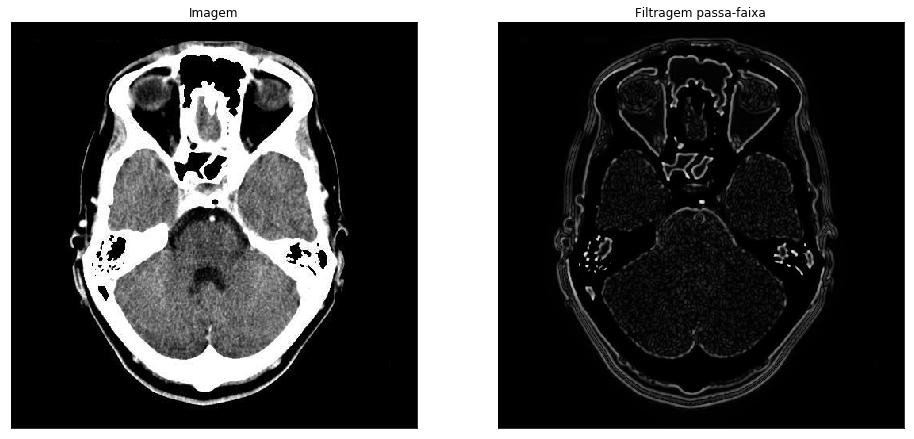

Wall time: 469 ms


In [5]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Imagem
axA.imshow(imagem, cmap='gray')
axA.set_title('Imagem')
axA.set_xticks([])
axA.set_yticks([])

# Filtragem passa-faixa
axB.imshow(resultado, cmap='gray')
axB.set_title('Filtragem passa-faixa')
axB.set_xticks([])
axB.set_yticks([])
plt.show()

### 1.2. Campo vetorial e Contorno
---
- **Contorno** [*contour plot*]: Visualização de contorno sobre a superfície de um campo escalar, representados pela equação:

$$
\large z=(1 - x + yx^3 + y^5)e^{-x^2-y^2}
$$

- **Campo vetorial** [*quiver plot*]: Visualização do compo vetorial decomposto em coordenadas retangulares pelo operador gradiente em **z**:

$$
\large
\nabla z=\left(\frac{\partial z}{\partial x},\frac{\partial z}{\partial y}\right)
=
\frac{\partial z}{\partial x}i+\frac{\partial z}{\partial y}j
$$

de tal forma que:

$$
\large
\begin{aligned}
\frac{\partial z}{\partial x} &= (-1+3yx^2)e^{-x^2-y^2}-2x(1 - x + yx^3 + y^5)e^{-x^2-y^2} \\
\frac{\partial z}{\partial y} &= (x^3+5y^4)e^{-x^2-y^2}-2y(1 - x + yx^3 + y^5)e^{-x^2-y^2}
\end{aligned}
$$

In [6]:
M, N = 32j, 32j
Y, X = np.mgrid[-3:3:N*8, -3:3:M*8]
Z = (1 - X + Y*X**3 + Y**5)*np.exp(-X**2 - Y**2)

In [7]:
# Dados para campo vetorial
y, x = np.mgrid[-3:3:N, -3:3:M]
f = (1 - x + y*x**3 + y**5)
g = np.exp(-x**2 - y**2)
dzdx = (-1 + 3*y*x**2)*g - 2*x*f*g
dzdy = (x**3 + 5*y**4)*g - 2*y*f*g
norma = (dzdx**2 + dzdy**2)**0.5
dzdxn = dzdx/norma
dzdyn = dzdy/norma

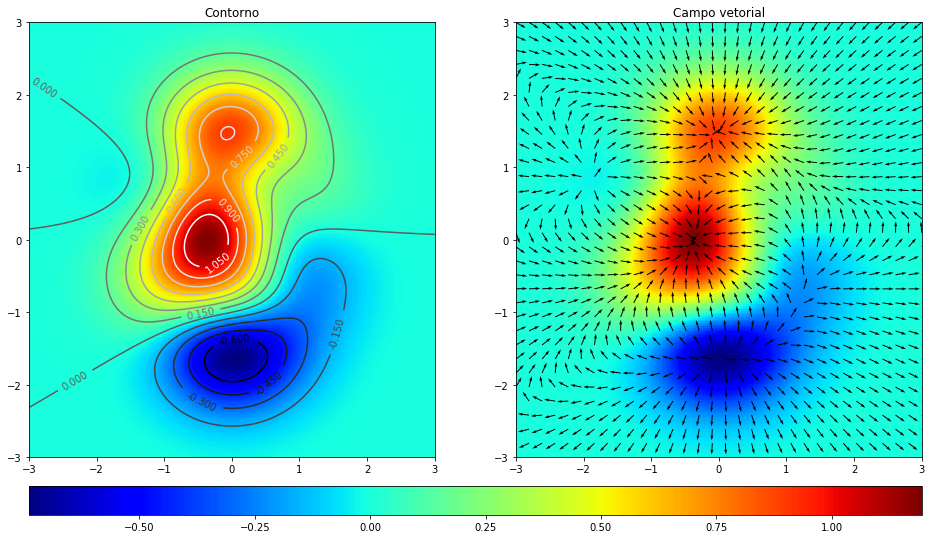

Wall time: 470 ms


In [8]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Controno
axA.pcolormesh(X, Y, Z, cmap='jet')
cont = axA.contour(X, Y, Z, 16, cmap='gray')
axA.clabel(cont, inline=True)
axA.set_title('Contorno')

# Campo vetorial
mesh = axB.pcolormesh(X, Y, Z, cmap='jet')
axB.quiver(x, y, dzdxn, dzdyn, scale=36)
axB.set_title('Campo vetorial')

cbar_ax = fig.add_axes([0.125, 0.025, 0.775, 0.05])
fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')

plt.show()

### 1.3. Geográfico
---
Dados no formato *shapefile* retirados no site da [GADM](http://www.gadm.org/).
- **Estado**: Visualização geográfica do país *Brasil*, com destaque no estado do *Pará*.
- **Cidade**: Visualização geográfica do estado *Pará*, com destaque na cidade de *Tucuruí*.

In [9]:
# Dados Geográficos
import shapefile
# estados
sf_estados = shapefile.Reader('../_data/Brazil-Map-Shapefile/BRA_adm1')
shapes_estados = sf_estados.shapes()
records_estados = sf_estados.records()
n_estados = len(records_estados)
# cidades
sf_cidades = shapefile.Reader('../_data/Brazil-Map-Shapefile/BRA_adm2')
shapes_cidades = sf_cidades.shapes()
records_cidades = sf_cidades.records()
sc_pa, rc_pa = zip(*[[s, r] for s, r in zip(shapes_cidades, records_cidades) if 'Pará' in r])
n_cidades_pa = len(rc_pa)

In [10]:
# Parâmetros de visualização
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
import matplotlib.patches as mpatches
cmapGeoEst = cm.get_cmap('summer')
cmapGeoCid = cm.get_cmap('cool')

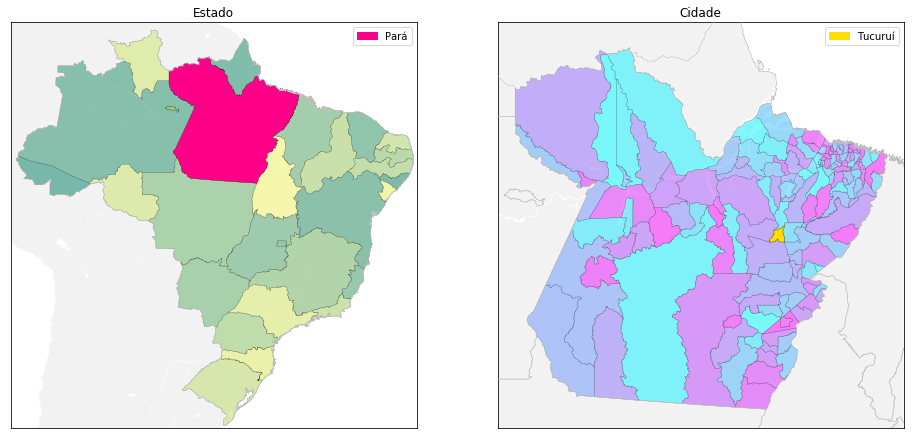

Wall time: 7.32 s


In [11]:
%%time
fig, (axA, axB) = plt.subplots(1, 2)

# Brasil
mapaA = Basemap(llcrnrlon=-74.5, llcrnrlat=-34, urcrnrlon=-34.5, urcrnrlat=6,
               resolution='i')
mapaA.ax = axA
axA.set_title('Estado')
mapaA.fillcontinents(color='0.95')
for i, (shape, record) in enumerate(zip(shapes_estados, records_estados)):
    UF = record[5].split('.')[-1]
    lons, lats = np.array(shape.points).T
    dados = np.array(mapaA(lons, lats)).T
    partes = np.split(dados, shape.parts)
    linhas = LineCollection(partes, antialiaseds=(1,))
    linhas.set_edgecolors('black')
    if UF == 'PA':
        linhas.set_facecolors('#ff0088')
    else:
        linhas.set_facecolors(cmapGeoEst(i/n_estados))
        linhas.set_alpha(0.5)
    linhas.set_linewidth(0.25)
    axA.add_collection(linhas)
mapaA.readshapefile('../_data/Brazil-Map-Shapefile/BRA_adm0', 'pais', color='0.75', zorder=3)
estado_patch = mpatches.Patch(color='#ff0088', label='Pará')
axA.legend(handles=[estado_patch])

# Pará
mapaB = Basemap(llcrnrlon=-59.5, llcrnrlat=-10.5, urcrnrlon=-45.5, urcrnrlat=3.5,
               resolution='i')
mapaB.ax = axB
axB.set_title('Cidade')
mapaB.fillcontinents(color='0.95')
for i, (shape, record) in enumerate(zip(sc_pa, rc_pa)):
    estado, cidade = record[4], record[6]
    lons, lats = np.array(shape.points).T
    dados = np.array(mapaA(lons, lats)).T
    partes = np.split(dados, shape.parts)
    linhas = LineCollection(partes, antialiaseds=(1,))
    linhas.set_edgecolors('black')
    if cidade == 'Tucuruí':
        linhas.set_facecolors('#ffdd00')
    else:
        linhas.set_facecolors(cmapGeoCid(i/n_cidades_pa))
        linhas.set_alpha(0.5)
    linhas.set_linewidth(0.25)
    axB.add_collection(linhas)
mapaB.readshapefile('../_data/Brazil-Map-Shapefile/BRA_adm1', 'estados', color='0.75', zorder=3)
cidade_patch = mpatches.Patch(color='#ffdd00', label='Tucuruí')
axB.legend(handles=[cidade_patch])

plt.show()